# Final Project      
### Research Computing: 16:107:606:01 SP TOPC ATMOSPH SCI
## By Mazvita Chikomo
### Part 1: 

## Aim:
This class project aims to highlight the key coding steps required to download, clean, and analyze freely available real time precipitation data and see its relationship with tree rooting depth utilizing Xarray, Dask MatplotLib, Pandas, and various coding functions and commands.
The project is split into 6 Parts with each chapter described below:
#### Part 1: File Management
- Chapter 1: Creating and setting up a directory for the files.
#### Part 2: Obtaining Precipitation Data
 - Chapter 2: Pull out precipitation data for many selected sites from a global dataset MSWEP https://www.gloh2o.org/mswep/,
#### Part 3: Working with Precipitation Data 
__**Read through chapters 2 to 6**__
_( I have provided the necessary files for the last steps and they are already in the repository no need to download, **If you want to try I have given you access to my repository**)_
 - Chapter 3: Testing out the operations for this project using a single file (Dask not required)
#### Part 4: Introducing Dask: Working with BIG DATA
 - Chapter 4: Introducing Dask working with a few files to calculate the average annual precipitation over 4 year period
#### Part 5: Working with even BIGGER DATA!
- Chapter 5: Calculating Average Annual Precipitation over the ten year period
- Chapter 6:Storing the anual precipitation data as a dask xarray file, converting to Pandas Dataframe and saving it as a CSV File
#### Part 6: Obtaining Plant Data
- Chapter 5: Cleaning the CSV Observation Plant DATA
#### Part 7: Working with Both Plant and Precipitaion DATA
- Chapter 7: Merging the two Dataset
- Chapter 6: Analayzing and Visualizing Plant Precipitation Data

##### Reproducibility: 
Since this project works with Big Data, Please read through Chapters 3 to 6. I have downloaded and saved the data as CSV files which are in the project repository.


## Part 1: File Management for the project

- For this project, I created a __Final Project directory__ in the home directory where most of the work and files will be solved, the dataset was saved in the __scratch directory__, additional information on the steps to do this can be found in __Chapter 2.__

  


#### Steps to create the Final Project directory 
1. Go to https://ondemand.hpc.rutgers.edu/ and navigate to open the cluster tab and click the amarel cluster shell access to open Amarel
##### After logging in, change directory to our class directory:
(base) [mmc368@amarel1 ~]$ cd rcaes

2. __Activate the class environment:__

(base) [mmc368@amarel1 rcaes]$ conda activate rcaes_env

3. __Verify which directory you are in and make sure you are in your user directory__

rcaes_env) [mmc368@amarel1 ~]$ pwd
_/home/mmc368/rcaes_

4. __Create a new directory and name it Final Project__

_rcaes_env) [mmc368@amarel1 ~]$ mkdir Final_Project_

__For the rest of the project work in this directory__



## Part 2: Pulling out Precipitation data

For this project I will be using MSWEP data from: https://www.gloh2o.org/mswep/

MSWEP is a global precipitation product with a 3‑hourly 0.1° resolution available from 1979 to ~3 hours from real-time. The product is unique in that it merges gauge, satellite, and reanalysis data to obtain the highest quality precipitation estimates at every location.

MSWEP incorporates daily gauge observations and accounts for gauge reporting times to reduce temporal mismatches between satellite-reanalysis estimates and gauge observations. Near real-time estimates are available with a latency of ~3 hours. MSWEP is compatible with GloH2O’s operational Multi-Source Weather (MSWX); MSWX forecasts can thus be used to extend MSWEP into the future. MSWEP tends to exhibit better performance than other precipitation products in both densely gauged and ungauged regions (Beck et al., 2017, and Beck et al., 201

##### To download the data navigate to the bottom of the page and request access by clicking the Apply button.

### 2i)Downloading and Installing rclone to access data shared in Google Drive Folder
Once you have recieved the link to the googledrive, it is now time to download the data to your device or remote connection. To download the data you will need to use __rclone.__

__Downloading and Installing Rclone:__

There are two ways to download and install Rclone, but the preferred method for this project will be to use __Winget__

1. __Using Winget:__
   
i. Open the comman terminal on your pc [You can do this by searching command prompt on your device]

ii. Navigate to the directory where you would like to save the application and type: __Winget install Rclone.Rclone__
    _C:\Users\Mmc368\Downloads>winget install Rclone.Rclone_

iii. You will then see this message:

_The `msstore` source requires that you view the following agreements before using.
Terms of Transaction: https://aka.ms/microsoft-store-terms-of-transaction
The source requires the current machine's 2-letter geographic region to be sent to the backend service to function properly (ex. "US")._

_Do you agree to all the source agreements terms?
[Y] Yes  [N] No:_


iv. Enter: y to the question

    _[Y] Yes  [N] No:y__id>
ogleDrive
: cmount


 ### Uploading the Data onto the scratch on Amarel to work with: 

### 2ii) Configuring Rclone:
Start by checking version:

__If greater than 60.0 then one can continue with the rest of the steps to configure:__

__Go to the command terminal and navigate to the directory where you saved rclone and check the version:__

C:\Users\Mmc368\Downloads>rclone version

_Output:_

rclone v1.64.2
- os/version: Microsoft Windows 10 Enterprise 22H2 (64 bit)
- os/kernel: 10.0.19045.3570 (x86_64)
- os/type: windows
- os/arch: amd64
- go/version: go1.21.3
- go/linking: static
- go/tags: cmount

__Now Configure:__
(What you enter is in bold)
__C:\Users\Mmc368\Downloads>rclone config__

2023/11/26 21:59:24 NOTICE: Config file "C:\\Users\\Mmc368\\AppData\\Roaming\\rclone\\rclone.conf" not found - using defaults
No remotes found, make a new one?
n) New remote
s) Set configuration password
q) Quit config

__n/s/q> n__

Enter name for new remote.

__name> GoogleDrive__

Option Storage.
Type of storage to configure.
Choose a number from below, or type in your own value.

__Storage> drive__

Option client_id.
Google Application Client Id
Setting your own is recommended.
See https://rclone.org/drive/#making-your-own-client-id for how to create your own.
If you leave this blank, it will use an internal key which is low performance.
Enter a value. Press Enter to leave empty.

__client_id>__(Leave Blank and press Enter)

Option client_secret.
OAuth Client Secret.
Leave blank normally.
Enter a value. Press Enter to leave empty.

__client_secret>__(Leave Blank and press Enter)

Option scope.
Scope that rclone should use when requesting access from drive.
Choose a number from below, or type in your own value.
Press Enter to leave empty.
 1 / Full access all files, excluding Application Data Folder.
   \ (drive)
   
 2 / Read-only access to file metadata and file contents.
   \ (drive.readonly)
   / Access to files created by rclone only.
   
 3 | These are visible in the drive website.
   | File authorization is revoked when the user deauthorizes the app.
   \ (drive.file)
   / Allows read and write access to the Application Data folder.
   
 4 | This is not visible in the drive website.
   \ (drive.appfolder)
   / Allows read-only access to file metadata but
   
 5 | does not allow any access to read or download file content.
   \ (drive.metadata.readonly)
   
__scope> 1__

Option service_account_file.
Service Account Credentials JSON file path.
Leave blank normally.
Needed only if you want use SA instead of interactive login.
Leading `~` will be expanded in the file name as will environment variables such as `${RCLONE_CONFIG_DIR}`.
Enter a value. Press Enter to leave empty.
service_account_file>

Edit advanced config?
y) Yes
n) No (default)

__y/n> n__

Use web browser to automatically authenticate rclone with remote?
 * Say Y if the machine running rclone has a web browser you can use
 * Say N if running rclone on a (remote) machine without web browser access
If not sure try Y. If Y failed, try N.

y) Yes (default)
n) No

__y/n> y__

#### At this point you will log into you google drive account in a browser
2023/11/26 22:03:33 NOTICE: If your browser doesn't open automatically go to the following link: http://127.0.0.1:53682/auth?state=nYC3BrJB459dAZGw1N7sIQ
2023/11/26 22:03:33 NOTICE: Log in and authorize rclone for access
2023/11/26 22:03:33 NOTICE: Waiting for code...
2023/11/26 22:03:48 NOTICE: Got code
Configure this as a Shared Drive (Team Drive)?

y) Yes
n) No (default)

__y/n> n__

Configuration complete.
Options:
- type: drive
- scope: drive
- token: {"access_token":"ya29.a0AfB_byCgoJrQDaUOsdoJwJkk8Da32fsv78HQnaXI7qjOgqbHMcOflkqP6iaPyLaOseaLv9Zi_dDfkfkjCh2O8lSVXFrFNJUcqPmxsqp-t1dxYzsX_WBy3WmT6iza1Y5CQvSslyahh4nMPmEMfNItrmgPBC_iLh8TH1HPaCgYKAZgSARESFQHGX2Mill0HG2AhbZlxqJEizaczoQ0171","token_type":"Bearer","refresh_token":"1//05GgDkA3hdNqBCgYIARAAGAUSNwF-L9Irh7KTNCCuzpd0pMsVmX1Bb6CgQmgONAF3ND2skp5Dng7tNXBHlKXhOb_A2Z0kCfNUdvg","expiry":"2023-11-26T23:03:47.3939443-05:00"}


Keep this "GoogleDrive" remote?
y) Yes this is OK (default)
e) Edit this remote
d) Delete this remote

__y/e/d> y__

Current remotes:

Name                 Type
====                 ====
GoogleDrive          drive

e) Edit existing remote
n) New remote
d) Delete remote
r) Rename remote
c) Copy remote
s) Set configuration password
q) Quit config
__e/n/d/r/c/s/q>q__th on Amarel to work with:

#### 2iii) Downloading the Data onto PC then uploading onto the scratch in Amarel to work with:

__After configuration:__

Navigate to the shared folder in Google Drive using rclone:
 rclone lsd --drive-shared-with-me GoogleDrive:  


Downlaod the data:
 rclone sync -v --exclude 3hourly/ --drive-shared-with-me GoogleDrive:/MSWEP_V280 c:/temp/MSWEP_V280

__After what seems like forever:__

2023/11/27 11:41:23 INFO  :
Transferred:      112.344 GiB / 112.344 GiB, 100%, 8.193 MiB/s, ETA 0s
Checks:             32479 / 32479, 100%
Transferred:        32818 / 32818, 100%
Elapsed time:  13h28m15.7s

__To upload onto amarel:__

_In the command terminal:_

scp -r C:\Temp\MSWEP_V280 mmc368:scp -r (location to folder to be copied) username@amarel.rutgers.edu:(location to be copied to)

Which would look like this:
 
 C:\Temp\MSWEP_V280

scp -r C:\Temp\MSWEP_V280 mmc368:scp -r (C:\Temp\MSWEP_V280) mmc368@amarel.rutgers.edu:(/scratch/mmc368)

__Now we can get started now that precipitation data is on Amarel__sitory:



## Now the Coding Begins!

### Managing imports required for the project:


In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import dask as da
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar

### Part 3: Working with precipitation Data

#### Chapter 3:  Testing out the operations for this project using a single file (Dask not required) 

Loading the dataset: Decided to __use xarray__ instead of __pandas__ because this data has muliple dimensions(time,lat,lon) and Xarray can integrate with Dask to work with big data

In [2]:
#Testing with one file
#Opening one file
data = xr.open_dataset('/scratch/mmc368/MSWEP_V280/NRT/Monthly/202012.nc')

In [3]:
#Viewing the dataset
data

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 1)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2020-12-01T22:46:52.499999744
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    history:          Created on 2021-06-26 02:25
    input_data_hash:  4069976da1f87ac39aa1e2bac261761f8652611b42788963bc0186a...

In [4]:
#Plotting average precipitation for 
data_mean = data.precipitation.mean(dim='time')

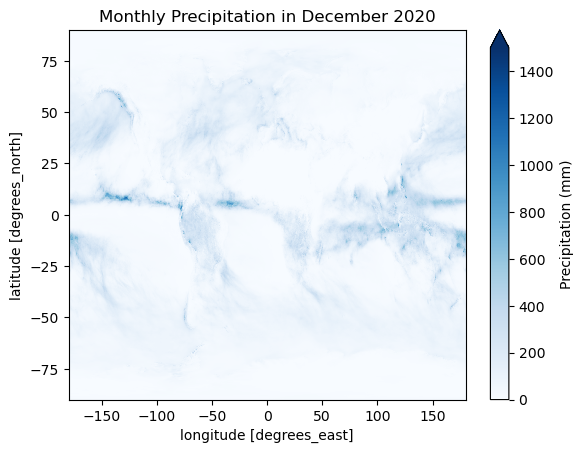

In [44]:
fig, ax = plt.subplots()
h = data_mean.plot(vmin = 0, vmax = 1500, cmap='Blues', ax=ax)
plt.title('Monthly Precipitation in December 2020')
h.colorbar.set_label('Precipitation (mm)');


In [6]:
#Converting the data to a pandas dataframe to prepare it for export as a csv
df = data_mean.to_dataframe()
df

precipitation
lat        lon                       
 89.949997 -179.949997      18.351562
           -179.849991      18.351562
           -179.750000      18.351562
           -179.649994      18.351562
           -179.550003      18.351562
...                               ...
-89.950012  179.550003       9.703125
            179.650009       9.703125
            179.750015       9.703125
            179.850021       9.703125
            179.949997       9.570312

[6480000 rows x 1 columns]

In [43]:
#Saving the new datset as a csv file:
df.to_csv('monthly_precip_2020_12.csv')

### Part 4: Introducing Dask - Working with BIG DATA: 
#### Chapter 4: Calculating the mean annual precipitaion over a 35 month period

__Opening the files:__

In [9]:
#Opening Multiple Files and assigning chunk size automatically
ds = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/NRT/Monthly/*.nc', chunks={'time': 'auto'} )

In [10]:
#Visualizing the data
ds

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 35)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2020-12-01T22:46:52.499999744 ... 20...
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>
Attributes:
    history:          Created on 2021-06-26 02:25
    input_data_hash:  4069976da1f87ac39aa1e2bac261761f8652611b42788963bc0186a...

__Now the data is a dask array with chuck size =1,32,32__

In [11]:
ds['precipitation'].data

dask.array<concatenate, shape=(35, 1800, 3600), dtype=float32, chunksize=(1, 32, 32), chunktype=numpy.ndarray>

### Computing the annual mean precipitation
__Steps:__
1. Resample the data into yearly values
2. Calculate the mean over the time dimension to find the average precipitation at each location
3. Compute the mean to actually calculate
4. Plot the global Average at each location.

5. Plot a line graph to show global average precipitation over the years as a line graph

In [12]:
# Step 1 resampling
ds_a=ds.resample(time= 'A').mean()
ds_a

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 4)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2023-12-31
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>
Attributes:
    history:          Created on 2021-06-26 02:25
    input_data_hash:  4069976da1f87ac39aa1e2bac261761f8652611b42788963bc0186a...

__Now there are 4 time steps for the 4 years of annual precipitation__

In [13]:
#Step 2:Calculate the mean over the time dimension to find the average precipitation at each location
ds_a_mean = ds_a.mean(dim = 'time')
%time ds_a_mean

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>

In [14]:
#Step 3. Compute the mean to actually calculate the mean:
from dask.diagnostics import ProgressBar

#Computing the mean to save the output as a numpy array
with ProgressBar():
    result = ds_a_mean.compute()
result

[########################################] | 100% Completed | 11m 8ss


<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 22.05 22.05 22.05 ... 7.004 7.004 6.921

__We have now computed the annual mean precipitation over the 4 years at each location and the data has been saved as an xarray dataset__ 

### Visualizing the Mean Annual Precipitation over the four year period

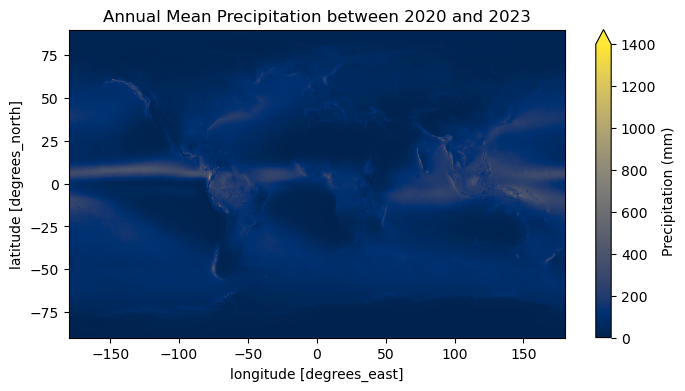

In [45]:
fig, ax = plt.subplots(figsize= (8,4))
plot = result.precipitation.plot(ax=ax, vmin=0,vmax=1400, cmap = 'cividis')
ax.set_title('Annual Mean Precipitation between 2020 and 2023');
plot.colorbar.set_label('Precipitation (mm)');

### Part 5: Working with even BIGGER DATA!

For this part of the project we will calculate the mean annual precipitation over a ten year period from 2000 January to 2019 December
#### Chapter 5: Calculating Mean Annual Precipitaion over 10 yr Period

In [53]:
#Opening Multiple Files and assigning chunk size automatically
ds = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/201*.nc', chunks={'time': 'auto'})

In [55]:
ds

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 120)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2019-12-01
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>
Attributes:
    history:  Created on 2021-02-04 03:21

In [18]:
#This resamples the data into yearly data and averages each 12 month data to make up the year
ds_a=ds.resample(time= 'A').mean()
ds_a

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 10)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2010-12-31 2011-12-31 ... 2019-12-31
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>
Attributes:
    history:  Created on 2021-02-04 03:21

In [19]:
#To obtain the mean precipitation over the ten year period
ds_a_mean = ds_a.mean(dim='time')
ds_a_mean

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>

In [57]:
#This is where we use the dask diagnostics bar to track the process
from dask.diagnostics import ProgressBar

#Computing the mean to save the output as an array
with ProgressBar():
    result = ds_a_mean.compute()
result

[########################################] | 100% Completed | 51m 27s


<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 20.65 20.65 20.65 ... 3.852 3.851 3.866

#### Chapter 6: Converting 10 year average precipitation Xarray to pandas to csv

In [58]:
# Converting to a pandas dataframe:
df_2010_201912 = result.to_dataframe()
df_2010_201912

precipitation
lon         lat                      
-179.949997  89.949997      20.647396
             89.849998      20.757812
             89.750000      20.741144
             89.649994      20.753124
             89.549995      20.922398
...                               ...
 179.949997 -89.550003       4.409375
            -89.650009       4.401042
            -89.750000       4.384895
            -89.850006       4.379687
            -89.950012       3.865625

[6480000 rows x 1 columns]

In [59]:
#Renaming the column
df_2010_201912.rename(columns={'precipitation':'10yr_average_precip_2010_201912'})

10yr_average_precip_2010_201912
lon         lat                                        
-179.949997  89.949997                        20.647396
             89.849998                        20.757812
             89.750000                        20.741144
             89.649994                        20.753124
             89.549995                        20.922398
...                                                 ...
 179.949997 -89.550003                         4.409375
            -89.650009                         4.401042
            -89.750000                         4.384895
            -89.850006                         4.379687
            -89.950012                         3.865625

[6480000 rows x 1 columns]

In [60]:
#Saving as a csv file
df.to_csv('average10yr_precip_2010_201912.csv')

__but this is still a big file (>100mb) so maybe we should only save for the areas we are interested in__

#### Plotting the ten year mean annual precipitaion (2010-2019 December)

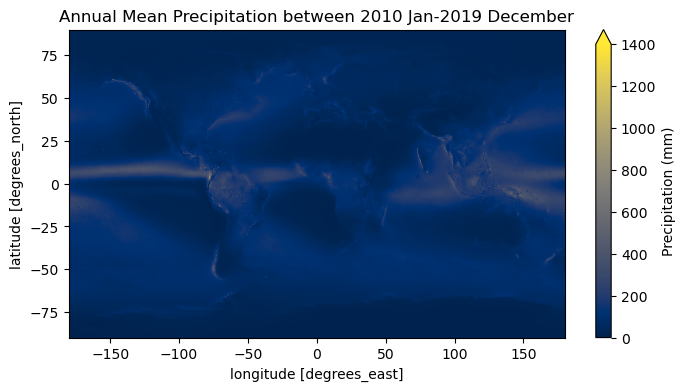

In [61]:
fig, ax = plt.subplots(figsize= (8,4))
plot = result.precipitation.plot(ax=ax, vmin=0,vmax=1400, cmap = 'cividis')
ax.set_title('Annual Mean Precipitation between 2010 Jan-2019 December');
plot.colorbar.set_label('Precipitation (mm)');

### Calculating Monthly Mean for period between 2000 to 2020

#### January (step by step example)

In [84]:
#opening all files starting with 20 and ending with 01 to capture all the january data for years startng from 2000
jan = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**01.nc', chunks={'time': 'auto'})

In [85]:
#Viewing the dataset
jan

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 21)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2020-01-01
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>
Attributes:
    history:  Created on 2021-02-04 03:42

- __notice that there are 21 timesteps for the 21 years of data__

- __the dataset is still a daskarray__

In [86]:
#Calculating the mean monthly precipitation for January
jan_mean = jan.mean(dim='time')
jan_mean

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>

__notice that the time dimension has been dropped__

In [87]:
#Since this is a Daskarray, to store the output and compute the calculation, use .compute()
#Since this process takes long, add a progress bar to view progress
from dask.diagnostics import ProgressBar

with ProgressBar():
    jan_mean_calc = jan_mean.compute()
jan_mean_calc

[########################################] | 100% Completed | 517.80 s


<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 14.18 14.19 14.18 ... 2.003 2.003 2.003

In [91]:
monthly_precip = jan_mean_calc.to_dataframe()
monthly_precip = monthly_precip.rename(columns={'precipitation':'jan'})

In [92]:
monthly_precip

jan
lon         lat                  
-179.949997  89.949997  14.184524
             89.849998  14.220238
             89.750000  14.187500
             89.649994  14.157738
             89.549995  13.913691
...                           ...
 179.949997 -89.550003   2.755952
            -89.650009   2.767857
            -89.750000   2.767857
            -89.850006   2.776786
            -89.950012   2.002976

[6480000 rows x 1 columns]

In [93]:
feb = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**02.nc', chunks={'time': 'auto'})
feb

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 21)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time           (time) datetime64[ns] 2000-02-01 2001-02-01 ... 2020-02-01
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>
Attributes:
    history:  Created on 2021-02-04 03:29

In [94]:
feb_mean = feb.mean(dim='time')


In [95]:
with ProgressBar():
    feb_calc = feb_mean.compute()
feb_calc

[########################################] | 100% Completed | 518.91 s


<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Data variables:
    precipitation  (lat, lon) float32 10.53 10.58 10.58 ... 2.997 2.997 3.045

In [98]:
feb = feb_calc.to_dataframe()
feb = feb.rename(columns={'precipitation':'february'})

In [99]:
monthly_precip['february']=feb['february']
monthly_precip

jan   february
lon         lat                             
-179.949997  89.949997  14.184524  10.532738
             89.849998  14.220238  10.693453
             89.750000  14.187500  10.669642
             89.649994  14.157738  10.654762
             89.549995  13.913691  10.767858
...                           ...        ...
 179.949997 -89.550003   2.755952   3.824405
            -89.650009   2.767857   3.687500
            -89.750000   2.767857   3.684524
            -89.850006   2.776786   3.684524
            -89.950012   2.002976   3.044643

[6480000 rows x 2 columns]

In [100]:
march = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**03.nc', chunks={'time': 'auto'})
march_mean = march.mean(dim='time')

with ProgressBar():
    march_calc = march_mean.compute()
march_calc

march = march_calc.to_dataframe()
march = march.rename(columns={'precipitation':'march'})

march

[########################################] | 100% Completed | 515.56 s


march
lon         lat                  
-179.949997  89.949997  11.723214
             89.849998  11.824405
             89.750000  11.785714
             89.649994  11.770833
             89.549995  11.788691
...                           ...
 179.949997 -89.550003   5.017857
            -89.650009   5.136905
            -89.750000   5.133929
            -89.850006   5.130952
            -89.950012   4.693452

[6480000 rows x 1 columns]

In [101]:
april = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**04.nc', chunks={'time': 'auto'})
april_mean = april.mean(dim='time')

with ProgressBar():
    april_calc = april_mean.compute()
april_calc

april = april_calc.to_dataframe()
april = april.rename(columns={'precipitation':'april'})

[########################################] | 100% Completed | 519.88 s


In [103]:
may = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**05.nc', chunks={'time': 'auto'})
may_mean = may.mean(dim='time')

with ProgressBar():
    may_calc = may_mean.compute()
may_calc


may = may_calc.to_dataframe()
may = may.rename(columns={'precipitation':'may'})

[########################################] | 100% Completed | 518.88 s


In [104]:
june = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**06.nc', chunks={'time': 'auto'})
june_mean = june.mean(dim='time')

with ProgressBar():
    june_calc = june_mean.compute()
june_calc

june = june_calc.to_dataframe()
june = june.rename(columns={'precipitation':'june'})

[########################################] | 100% Completed | 519.73 s


In [105]:
july = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**07.nc', chunks={'time': 'auto'})
july_mean = july.mean(dim='time')

with ProgressBar():
    july_calc = july_mean.compute()
july_calc

july = july_calc.to_dataframe()
july = july.rename(columns={'precipitation':'july'})

[########################################] | 100% Completed | 513.35 s


In [106]:
august = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**08.nc', chunks={'time': 'auto'})
august_mean = august.mean(dim='time')

from dask.diagnostics import ProgressBar

with ProgressBar():
    august_calc = august_mean.compute()
august_calc

august = august_calc.to_dataframe()
august = august.rename(columns={'precipitation':'august'})

[########################################] | 100% Completed | 514.08 s


In [107]:
september = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**09.nc', chunks={'time': 'auto'})
september_mean = september.mean(dim='time')

with ProgressBar():
    september_calc = september_mean.compute()
september_calc

september = september_calc.to_dataframe()
september = september.rename(columns={'precipitation':'september'})

[########################################] | 100% Completed | 520.16 s


In [108]:
october = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**10.nc', chunks={'time': 'auto'})
october_mean = october.mean(dim='time')

with ProgressBar():
    october_calc = october_mean.compute()
october_calc

october = october_calc.to_dataframe()
october = october.rename(columns={'precipitation':'october'})

[########################################] | 100% Completed | 520.41 s


In [110]:
november = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**11.nc', chunks={'time': 'auto'})
november_mean = november.mean(dim='time')

with ProgressBar():
    november_calc = november_mean.compute()
november_calc

november = november_calc.to_dataframe()
november = november.rename(columns={'precipitation':'november'})

[########################################] | 100% Completed | 512.22 s


In [120]:
december = xr.open_mfdataset('/scratch/mmc368/MSWEP_V280/Past/Monthly/20**12.nc', chunks={'time': 'auto'})
december_mean = december.mean(dim='time')

with ProgressBar():
    december_calc = december_mean.compute()
december_calc

december = december_calc.to_dataframe()
december = december.rename(columns={'precipitation':'december'})

[########################################] | 100% Completed | 485.97 s


### Adding the columns to the monthly precipitation dataframe

In [122]:
monthly_precip['march']= march['march']
monthly_precip['april']= april['april']
monthly_precip['may']= may['may']
monthly_precip['june']= june['june']
monthly_precip['july']= july['july']
monthly_precip['august']= august['august']
monthly_precip['september']= september['september']
monthly_precip['october']= october['october']
monthly_precip['november']= november['november']
monthly_precip['december']= december['december']

monthly_precip

jan   february      march      april        may  \
lon         lat                                                                 
-179.949997  89.949997  14.184524  10.532738  11.723214  13.651786  15.556547   
             89.849998  14.220238  10.693453  11.824405  13.553572  15.562500   
             89.750000  14.187500  10.669642  11.785714  13.526786  15.505953   
             89.649994  14.157738  10.654762  11.770833  13.511905  15.595238   
             89.549995  13.913691  10.767858  11.788691  13.345238  16.297619   
...                           ...        ...        ...        ...        ...   
 179.949997 -89.550003   2.755952   3.824405   5.017857   5.187500   4.895833   
            -89.650009   2.767857   3.687500   5.136905   5.190476   4.857143   
            -89.750000   2.767857   3.684524   5.133929   5.199405   4.860119   
            -89.850006   2.776786   3.684524   5.130952   5.193452   4.854167   
            -89.950012   2.002976   3.044643   4.693452   4.761905   4.508929   

                             june       july     august  september    october  \
lon         lat                                                                 
-179.949997  89.949997  27.142857  26.232143  37.238094  34.809525  23.892857   
             89.849998  27.127975  26.282738  36.696430  34.726189  24.062500   
             89.750000  27.083334  26.267857  36.699406  34.767857  24.083334   
             89.649994  27.232143  26.267857  36.666668  34.848213  24.089285   
             89.549995  28.559525  26.794643  36.416668  35.330357  24.089285   
...                           ...        ...        ...        ...        ...   
 179.949997 -89.550003   4.550595   3.440476   5.217262   4.729167   4.880952   
            -89.650009   4.550595   3.419643   5.142857   4.809524   4.863095   
            -89.750000   4.553571   3.410714   4.985119   4.809524   4.863095   
            -89.850006   4.553571   3.416667   4.904762   4.812500   4.863095   
            -89.950012   4.199405   3.068452   4.622024   4.535714   4.309524   

                         november   december  
lon         lat                               
-179.949997  89.949997  18.642857  15.409375  
             89.849998  18.791666  15.287500  
             89.750000  18.767857  15.250000  
             89.649994  18.758928  15.231250  
             89.549995  18.675594  15.118750  
...                           ...        ...  
 179.949997 -89.550003   4.250000   3.156250  
            -89.650009   4.196429   3.050000  
            -89.750000   4.193452   3.040625  
            -89.850006   4.196429   3.040625  
            -89.950012   3.485119   2.271875  

[6480000 rows x 12 columns]

In [125]:
#Saving as a csv file
monthly_precip.to_csv('mean_monthly_precip_2000_2020.csv')

### Visualizing Mean Monthly Precipitation over the 20 Year Period:

Text(0.5, 1.0, 'Mean Monthly Precipitation between 2000 and 2020')

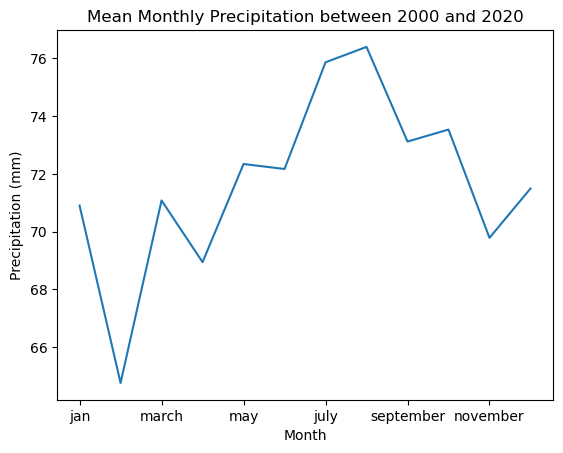

In [126]:
monthly_precip.mean().plot()
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Mean Monthly Precipitation between 2000 and 2020')

### More Efficient way to calculate monthly mean:

In [127]:
#Trying to do a for  loop to open each monthly data then merge the datasets to have monthly mean values but it did not 

#n=[01,02,03,04,05,06,07,08,09,10,11,12] (This did not work because it did not like to have the zero first)

with ProgressBar():
    n=(1,2,3,4,5,6,7,8,9)
    month = ('jan','feb','march','april','may','june','july','august','september')

#month = (jan,feb,march,april,may,june,july,august,october,september,november,december)
    mean_monthly_precip = []       

    for i in n:
        for key in month:
            key = xr.open_mfdataset(f'/scratch/mmc368/MSWEP_V280/Past/Monthly/20**0{i}.nc', chunks={'time': 'auto'})
            key_mean = key.mean(dim='time')
        
            #key_mean.rename(columns={'precipitation' : f'{key}'})
            mean_monthly_precip.append(data)

#Now to merge all the xarray files together
xr.concat(mean_monthly_precip, dim='time')

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 81)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Dimensions without coordinates: time
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>

In [128]:
mean_monthly_precip

[<xarray.Dataset>
 Dimensions:        (lon: 3600, lat: 1800)
 Coordinates:
   * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
   * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
 Data variables:
     precipitation  (lat, lon) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:        (lon: 3600, lat: 1800)
 Coordinates:
   * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
   * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
 Data variables:
     precipitation  (lat, lon) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:        (lon: 3600, lat: 1800)
 Coordinates:
   * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
   * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
 Data variables:
     precipitation  (lat, lon) float32 dask.array<chunksize=(32, 32), meta=np.ndarray>

The remianing missing months:

In [132]:
n_1=(10,11,12)
month_1 = ('september','november','december')

mean_monthly_precip = []       

for i in n_1:
    for key in month_1:
        data = xr.open_mfdataset(f'/scratch/mmc368/MSWEP_V280/Past/Monthly/20**{i}.nc', chunks={'time': 'auto'})
        data = data.mean(dim='time')
        #data.rename(columns={'precipitation' : f'{key}'})
    mean_monthly_precip.append(data)

#Now to merge all the xarray files together
xr.concat(mean_monthly_precip, dim='time')

<xarray.Dataset>
Dimensions:        (lon: 3600, lat: 1800, time: 3)
Coordinates:
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
Dimensions without coordinates: time
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>

__The problem with using this method for obtaining a datset with monthly mean is that monthly mean precipitaion for each dataset still has the old precipitation variable so difficult to discern which dataset goes with each month.__

In [ ]:
# Compiled Dataset:

In [133]:
monthly_precip

jan   february      march      april        may  \
lon         lat                                                                 
-179.949997  89.949997  14.184524  10.532738  11.723214  13.651786  15.556547   
             89.849998  14.220238  10.693453  11.824405  13.553572  15.562500   
             89.750000  14.187500  10.669642  11.785714  13.526786  15.505953   
             89.649994  14.157738  10.654762  11.770833  13.511905  15.595238   
             89.549995  13.913691  10.767858  11.788691  13.345238  16.297619   
...                           ...        ...        ...        ...        ...   
 179.949997 -89.550003   2.755952   3.824405   5.017857   5.187500   4.895833   
            -89.650009   2.767857   3.687500   5.136905   5.190476   4.857143   
            -89.750000   2.767857   3.684524   5.133929   5.199405   4.860119   
            -89.850006   2.776786   3.684524   5.130952   5.193452   4.854167   
            -89.950012   2.002976   3.044643   4.693452   4.761905   4.508929   

                             june       july     august  september    october  \
lon         lat                                                                 
-179.949997  89.949997  27.142857  26.232143  37.238094  34.809525  23.892857   
             89.849998  27.127975  26.282738  36.696430  34.726189  24.062500   
             89.750000  27.083334  26.267857  36.699406  34.767857  24.083334   
             89.649994  27.232143  26.267857  36.666668  34.848213  24.089285   
             89.549995  28.559525  26.794643  36.416668  35.330357  24.089285   
...                           ...        ...        ...        ...        ...   
 179.949997 -89.550003   4.550595   3.440476   5.217262   4.729167   4.880952   
            -89.650009   4.550595   3.419643   5.142857   4.809524   4.863095   
            -89.750000   4.553571   3.410714   4.985119   4.809524   4.863095   
            -89.850006   4.553571   3.416667   4.904762   4.812500   4.863095   
            -89.950012   4.199405   3.068452   4.622024   4.535714   4.309524   

                         november   december  
lon         lat                               
-179.949997  89.949997  18.642857  15.409375  
             89.849998  18.791666  15.287500  
             89.750000  18.767857  15.250000  
             89.649994  18.758928  15.231250  
             89.549995  18.675594  15.118750  
...                           ...        ...  
 179.949997 -89.550003   4.250000   3.156250  
            -89.650009   4.196429   3.050000  
            -89.750000   4.193452   3.040625  
            -89.850006   4.196429   3.040625  
            -89.950012   3.485119   2.271875  

[6480000 rows x 12 columns]

Now that we have the monthly mean data let's integrate the Plant Data into the project

### Chapter 5: Using Plant Observation Data and Merging the files

#### Getting Data from personal computer to Amarel(Uploading the excel data)
- __To load the excel data:__
- First create a new Folder in the Temp Folder with the MSWEP data
- Then save each excel sheet as an individual csv file and save it in the Temp director with the MSWEP data
- Upload that file to scratch using the code:

_scp -r C: /Temp/Plant_Data/  mmc368@amarel.edu:/scratch/mmc368/_

- Then it will prompt you to enter your password and then it will start copying the files to the intended scratch folder

C:\Temp\Plant_Data>scp -r C:/Temp/Plant_Data/ mmc368@amarel.rutgers.edu:/scratch/mmc368/

mmc368@amarel.rutgers.edu's password:

All_Plant_Data_10_2023_for_MC.csv                                         100%  660KB   1.1MB/s   00:00_

Fan_Water_table_data.csv                                                  100%  136KB   1.3MB/s   00:00_
C:\Temp\Plant_Data>_

ata>

__Now that the files are on amarel you can proceed to working in this JupyterLab Notebook__


### Preparing the csv files into Pandas dataframes to work with the precipitation data

For this csv file, we will open it using pandas, clean the data and the convert it into an xarray dataset

In [113]:
#Plant Data CSV files
infiltration_df = pd.read_csv('/scratch/mmc368/Plant_Data/Fan_Water_table_data.csv', encoding='windows-1254')
watertable_df = pd.read_csv('/scratch/mmc368/Plant_Data/All_Plant_Data_10_2023_for_MC.csv', encoding='windows-1254')

# Monthly Precipitation Datafile
monthly_data = pd.read_csv('/home/mmc368/Final_project/mean_monthly_precip_2000_2020.csv')

In [114]:
#First Check if the columns match up:
watertable_df.head()

,Observation Reference Number,Reference,Geographic Location,Biome,Observation Site,Phenology / Leaf Form,Growth Form / Stature,Common Name,Species Name (from lit),Genus (WFO accepted),...,Bedrock Nature,Depth (m).1,Human Alteration,Latitude (degree),Longitude (degree),Elevation (m),Unnamed: 37,Unnamed: 38,Approved,Name
0,1928.0,"Weaver, 1919","near Colorado Springs, Colorado",shortgrass prairie,NaN,perennial,herb,dwarf milkweed,Asclepias verticillata pumila,Asclepias,...,NaN,NaN,NaN,38.8282,-104.5710,1964,NaN,NaN,NaN,NaN
1,1.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Kaunisvaaran kangas,evergreen needle-leaf,tree,pine,Pinus sp.,Pinus,...,NaN,NaN,NaN,67.2470,26.8505,170,NaN,NaN,NaN,NaN
2,2.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Pitkän palot,evergreen needle-leaf,tree,pine,Pinus sp.,Pinus,...,NaN,NaN,NaN,67.8536,26.6652,228,NaN,NaN,NaN,NaN
3,3.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Rakkiluoston kangas,evergreen needle-leaf,tree,pine,Pinus sp.,Pinus,...,NaN,NaN,NaN,67.1522,26.9400,238,NaN,NaN,NaN,NaN
4,4.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Ojalahden Lehto,evergreen needle-leaf,tree,spruce,Picea sp.,Picea,...,NaN,NaN,NaN,66.6373,25.3457,100,NaN,NaN,NaN,NaN


In [115]:
monthly_data

,lon,lat,jan,february,march,april,may,june,july,august,september,october,november,december
0,-179.95,89.950000,14.184524,10.532738,11.723214,13.651786,15.556547,27.142857,26.232143,37.238094,34.809525,23.892857,18.642857,15.409375
1,-179.95,89.850000,14.220238,10.693453,11.824405,13.553572,15.562500,27.127975,26.282738,36.696430,34.726190,24.062500,18.791666,15.287500
2,-179.95,89.750000,14.187500,10.669642,11.785714,13.526786,15.505953,27.083334,26.267857,36.699406,34.767857,24.083334,18.767857,15.250000
3,-179.95,89.649994,14.157738,10.654762,11.770833,13.511905,15.595238,27.232143,26.267857,36.666668,34.848213,24.089285,18.758928,15.231250
4,-179.95,89.549995,13.913691,10.767858,11.788691,13.345238,16.297619,28.559525,26.794643,36.416668,35.330357,24.089285,18.675594,15.118750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479995,179.95,-89.550000,2.755952,3.824405,5.017857,5.187500,4.895834,4.550595,3.440476,5.217262,4.729166,4.880952,4.250000,3.156250
6479996,179.95,-89.650010,2.767857,3.687500,5.136905,5.190476,4.857143,4.550595,3.419643,5.142857,4.809524,4.863095,4.196429,3.050000
6479997,179.95,-89.750000,2.767857,3.684524,5.133929,5.199405,4.860119,4.553571,3.410714,4.985119,4.809524,4.863095,4.193452,3.040625
6479998,179.95,-89.850006,2.776786,3.684524,5.130952,5.193452,4.854166,4.553571,3.416667,4.904762,4.812500,4.863095,4.196429,3.040625


In [116]:
#Rename the Lat and Lon files to match the  watertable lat lon columns:
monthly_data = monthly_data.rename(columns = {'lat':'Latitude(degree)','lon':'Longitude(degree)'})

watertable_df = watertable_df.rename(columns = {'Latitude (degree)':'Latitude(degree)','Longitude (degree)':'Longitude(degree)'})
#infiltration_df = infiltration_df.rename(columns = {'Latitude (degree)':'Latitude(degree)','Longitude (degree)':'Longitude(degree)'})

In [119]:
# The Goal is to only keep the precipitation values for locations where plant rooting depth is known
watertable_df

,Observation Reference Number,Reference,Geographic Location,Biome,Observation Site,Phenology / Leaf Form,Growth Form / Stature,Common Name,Species Name (from lit),Genus (WFO accepted),...,Bedrock Nature,Depth (m).1,Human Alteration,Latitude(degree),Longitude(degree),Elevation (m),Unnamed: 37,Unnamed: 38,Approved,Name
0,1928.0,"Weaver, 1919","near Colorado Springs, Colorado",shortgrass prairie,NaN,perennial,herb,dwarf milkweed,Asclepias verticillata pumila,Asclepias,...,NaN,NaN,NaN,38.8282,-104.5710,1964,NaN,NaN,NaN,NaN
1,1.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Kaunisvaaran kangas,evergreen needle-leaf,tree,pine,Pinus sp.,Pinus,...,NaN,NaN,NaN,67.2470,26.8505,170,NaN,NaN,NaN,NaN
2,2.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Pitkän palot,evergreen needle-leaf,tree,pine,Pinus sp.,Pinus,...,NaN,NaN,NaN,67.8536,26.6652,228,NaN,NaN,NaN,NaN
3,3.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Rakkiluoston kangas,evergreen needle-leaf,tree,pine,Pinus sp.,Pinus,...,NaN,NaN,NaN,67.1522,26.9400,238,NaN,NaN,NaN,NaN
4,4.0,"Aaltonen, 1920","Lapland, Sodankyla, N. Finland",boreal forest,Ojalahden Lehto,evergreen needle-leaf,tree,spruce,Picea sp.,Picea,...,NaN,NaN,NaN,66.6373,25.3457,100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2020.0,"Zhou et al., 2017","Inner Mongolia, China, Oasis at S edge of Bada...",desert oasis,20yr plantation,evergreen needle-leaf,shrub,"saxaul, black saxaul, sacsaoul, saksaul",Haloxylon ammodendron,Haloxylon,...,NaN,NaN,20yr old plantation,39.3786,100.1475,1388,NaN,NaN,NaN,NaN
2020,2021.0,"Zhou et al., 2017","Inner Mongolia, China, Oasis at S edge of Bada...",desert oasis,40yr old plantation,evergreen needle-leaf,shrub,"saxaul, black saxaul, sacsaoul, saksaul",Haloxylon ammodendron,Haloxylon,...,NaN,NaN,40yr old lantation,39.3495,100.1328,1386,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__The Lat and Lon labels now match__

### Merging the Files:

- The general code to merge DataFrames on multiple common columns:

merged_df = pd.merge(df1, df2[['common_column1', 'common_column2', 'column_to_import']], on=['common_column1', 'common_column2'], how='left')

__Before Merging ensure Lat and Lon have the same number of Decimal Places and that values match__

__Steps to Clean Data to Merge:__
- Ensure that the values have the same number of decimal places so that they match using _.round()_
- Ensure that the values are all divisble by 5 since our precipitation lat lon data starts at 89.95 to -89.95, and  179.95 to -179.95 and decreases by ten each time using:
 
_df['column name']= np.round(df['column_name']/ .05) * .05)_


#### Rounding up column values to match before merging:

In [134]:
monthly_data

,Longitude(degree),Latitude(degree),jan,february,march,april,may,june,july,august,september,october,november,december
0,-179.95,89.950000,14.184524,10.532738,11.723214,13.651786,15.556547,27.142857,26.232143,37.238094,34.809525,23.892857,18.642857,15.409375
1,-179.95,89.850000,14.220238,10.693453,11.824405,13.553572,15.562500,27.127975,26.282738,36.696430,34.726190,24.062500,18.791666,15.287500
2,-179.95,89.750000,14.187500,10.669642,11.785714,13.526786,15.505953,27.083334,26.267857,36.699406,34.767857,24.083334,18.767857,15.250000
3,-179.95,89.649994,14.157738,10.654762,11.770833,13.511905,15.595238,27.232143,26.267857,36.666668,34.848213,24.089285,18.758928,15.231250
4,-179.95,89.549995,13.913691,10.767858,11.788691,13.345238,16.297619,28.559525,26.794643,36.416668,35.330357,24.089285,18.675594,15.118750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479995,179.95,-89.550000,2.755952,3.824405,5.017857,5.187500,4.895834,4.550595,3.440476,5.217262,4.729166,4.880952,4.250000,3.156250
6479996,179.95,-89.650010,2.767857,3.687500,5.136905,5.190476,4.857143,4.550595,3.419643,5.142857,4.809524,4.863095,4.196429,3.050000
6479997,179.95,-89.750000,2.767857,3.684524,5.133929,5.199405,4.860119,4.553571,3.410714,4.985119,4.809524,4.863095,4.193452,3.040625
6479998,179.95,-89.850006,2.776786,3.684524,5.130952,5.193452,4.854166,4.553571,3.416667,4.904762,4.812500,4.863095,4.196429,3.040625


__When looking at the above dataset be careful about decimal places and significant figures__

In [165]:
#Ensures that if we round it maintains 4 decimal places instead of dropping the zeroes after rounding
pd.options.display.float_format = '{:,.4f}'.format

#Ensuring the values are rounded to the nearest 0.05 if the value ends in 0 add 0.05 so that the values match
watertable_df['Latitude(degree)'] = np.round(watertable_df['Latitude(degree)']/ .05) * .05 
watertable_df['Longitude(degree)'] = np.round(watertable_df['Longitude(degree)']/ .05) * .05

watertable_df['Latitude(degree)'] = watertable_df['Latitude(degree)'].apply(lambda x: np.round(x / 0.05) * 0.05 + 0.05 if x % 1 == 0.000 else x)
watertable_df['Longitude(degree)'] = watertable_df['Longitude(degree)'].apply(lambda x: np.round(x / 0.05) * 0.05 + 0.05 if x % 1 == 0.000 else x)

#Need to now round the previous rounding to 4 decimal places
watertable_df['Latitude(degree)'] = watertable_df['Latitude(degree)'].round(4)
watertable_df['Longitude(degree)'] = watertable_df['Longitude(degree)'].round(4)

#Ensuring the values are rounded to the nearest 0.05 if the value ends in 0 add 0.05 so that the values match
monthly_data['Latitude(degree)'] = monthly_data['Latitude(degree)'].apply(lambda x: np.round(x / 0.05) * 0.05 + 0.05 if x % 1 == 0.000 else x)
monthly_data['Longitude(degree)'] = monthly_data['Longitude(degree)'].apply(lambda x: np.round(x / 0.05) * 0.05 + 0.05 if x % 1 == 0.000 else x)

#Rounding the Monthly_precip Lat lon to 4 decimal places
monthly_data['Latitude(degree)'] = monthly_data['Latitude(degree)'].round(4)
monthly_data['Longitude(degree)'] = monthly_data['Longitude(degree)'].round(4)



__Now look at the new Lat Lon Values for both the precipitation and plant observation data:__

In [166]:
monthly_data

,Longitude(degree),Latitude(degree),jan,february,march,april,may,june,july,august,september,october,november,december
0,-179.9500,89.9500,14.1845,10.5327,11.7232,13.6518,15.5565,27.1429,26.2321,37.2381,34.8095,23.8929,18.6429,15.4094
1,-179.9500,89.8500,14.2202,10.6935,11.8244,13.5536,15.5625,27.1280,26.2827,36.6964,34.7262,24.0625,18.7917,15.2875
2,-179.9500,89.7500,14.1875,10.6696,11.7857,13.5268,15.5060,27.0833,26.2679,36.6994,34.7679,24.0833,18.7679,15.2500
3,-179.9500,89.6500,14.1577,10.6548,11.7708,13.5119,15.5952,27.2321,26.2679,36.6667,34.8482,24.0893,18.7589,15.2312
4,-179.9500,89.5500,13.9137,10.7679,11.7887,13.3452,16.2976,28.5595,26.7946,36.4167,35.3304,24.0893,18.6756,15.1188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479995,179.9500,-89.5500,2.7560,3.8244,5.0179,5.1875,4.8958,4.5506,3.4405,5.2173,4.7292,4.8810,4.2500,3.1562
6479996,179.9500,-89.6500,2.7679,3.6875,5.1369,5.1905,4.8571,4.5506,3.4196,5.1429,4.8095,4.8631,4.1964,3.0500
6479997,179.9500,-89.7500,2.7679,3.6845,5.1339,5.1994,4.8601,4.5536,3.4107,4.9851,4.8095,4.8631,4.1935,3.0406
6479998,179.9500,-89.8500,2.7768,3.6845,5.1310,5.1935,4.8542,4.5536,3.4167,4.9048,4.8125,4.8631,4.1964,3.0406


In [158]:
#Checking if there are any values in Lat watertable and Lat precip data

# Example DataFrames
result = watertable_df['Longitude(degree)'].isin(monthly_data['Longitude(degree)']).count()

print(f"Any values from watertable_df['Longitude(degree)'] are in Longitude['degree']: {(result)}")

#for i in watertable_df['Latitude(degree)']:
result = watertable_df['Latitude(degree)'].isin(monthly_data['Latitude(degree)']).count()

print(f"Any values from watertable_df['Latitude(degree)'] are in Latitude['degree']: {(result)}")


Any values from watertable_df['Longitude(degree)'] are in Longitude['degree']: 2024
Any values from watertable_df['Latitude(degree)'] are in Latitude['degree']: 2024


In [168]:
watertable_df['Latitude(degree)']

0      38.8500
1      67.2500
2      67.8500
3      67.1500
4      66.6500
         ...  
2019   39.4000
2020   39.3500
2021       NaN
2022       NaN
2023       NaN
Name: Latitude(degree), Length: 2024, dtype: float64

In [169]:
# Merge DataFrames on multiple common columns
# Merge DataFrames on multiple common columns
Plant_precip_watertable = pd.merge(watertable_df, monthly_data[['Latitude(degree)', 'Longitude(degree)', 'jan','february','march','april','may','june','july',
                                                     'august','september','october','november','december']], on=['Latitude(degree)', 'Longitude(degree)'], how='inner')
# Merge DataFrames on multiple common columns

In [172]:
print(Plant_precip_watertable)

     Observation Reference Number                Reference  \
0                      1,928.0000             Weaver, 1919   
1                      1,924.0000             Weaver, 1919   
2                      1,926.0000             Weaver, 1919   
3                      1,927.0000             Weaver, 1919   
4                          1.0000           Aaltonen, 1920   
..                            ...                      ...   
601                    2,011.0000  Zerihun & Montagu, 2004   
602                    2,014.0000     Zerihun et al., 2006   
603                    2,015.0000       Zhang et al., 1999   
604                    2,016.0000       Zhang et al., 2014   
605                    2,021.0000        Zhou et al., 2017   

                                   Geographic Location  \
0                      near Colorado Springs, Colorado   
1                      near Colorado Springs, Colorado   
2                      near Colorado Springs, Colorado   
3                      

__For some reason I only retain 600 out of the 2000 entries__

In [181]:
#Showing that the data can then be used with other functions like groupby 
gb = Plant_precip_watertable.groupby('Biome')
gb
gb.jan.nlargest(10)

Biome                           
 plantation on upland heath  600   75.5982
Arid desert                  541   13.7530
                             542   13.7530
                             543   13.7530
                             544   13.7530
                                     ...  
xeric shrubland              141   12.5744
                             142   12.4226
                             143   12.4226
                             144   12.4226
                             145   12.4226
Name: jan, Length: 386, dtype: float64

### Conclusion:

So this brings me to the end of the project which highlights the complexities of working with big data, and how it can be used to analyze and visualize real data like large scale precipitation data.